# Level 1 – Task 1: Top Cuisines

## 🔍 Objective:
Identify the **top 3 most common cuisines** in the dataset and calculate the **percentage of restaurants** serving each.

## 🛠️ Approach:
1. Load the dataset and check the structure.
2. Clean and preprocess the `Cuisines` column.
3. Split multiple cuisines (if comma-separated).
4. Count the occurrences of each cuisine.
5. Identify the top 3 cuisines.
6. Calculate the percentage of restaurants that serve each of the top 3 cuisines.
7. Visualize with a bar plot.

## 📈 Insights:
This task helps us understand popular food trends and consumer demand in the restaurant industry.

Initial Data Overview:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandalu

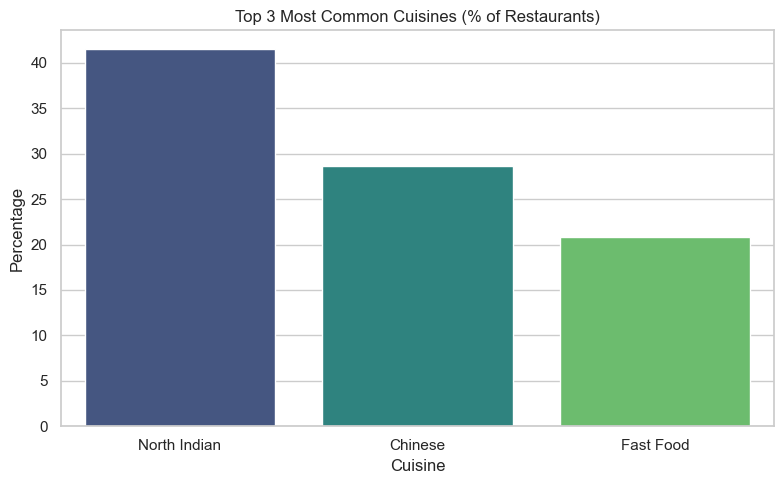

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../Dataset.csv")

# Display basic info
print("Initial Data Overview:")
print(df.head())
print(df.columns)

# Clean 'Cuisines' column – drop nulls
df = df.dropna(subset=['Cuisines'])

# Split and count each cuisine occurrence
from collections import Counter

all_cuisines = df['Cuisines'].str.split(', ')
cuisine_list = [item for sublist in all_cuisines for item in sublist]
cuisine_counts = Counter(cuisine_list)

# Convert to DataFrame
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['Cuisine', 'Count'])
cuisine_df = cuisine_df.sort_values(by='Count', ascending=False)

# Top 3 cuisines
top_3 = cuisine_df.head(3)
total_restaurants = len(df)
top_3 = top_3.copy()
top_3['Percentage'] = (top_3['Count'] / total_restaurants) * 100

# Display results
print("Top 3 Cuisines:\n", top_3)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x='Cuisine', y='Percentage', data=top_3, hue='Cuisine', palette='viridis', legend=False)
plt.title("Top 3 Most Common Cuisines (% of Restaurants)")
plt.ylabel("Percentage")
plt.xlabel("Cuisine")
plt.tight_layout()
plt.show()